Saving amazon_alexa.tsv to amazon_alexa (1).tsv


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Device set to use cpu
<ipython-input-6-899fec8cdef5>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'})


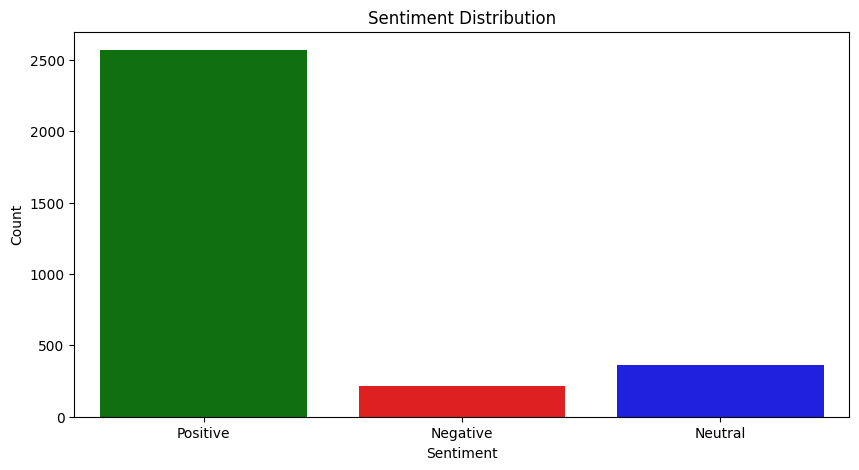

<ipython-input-6-899fec8cdef5>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='emotion', palette='coolwarm')


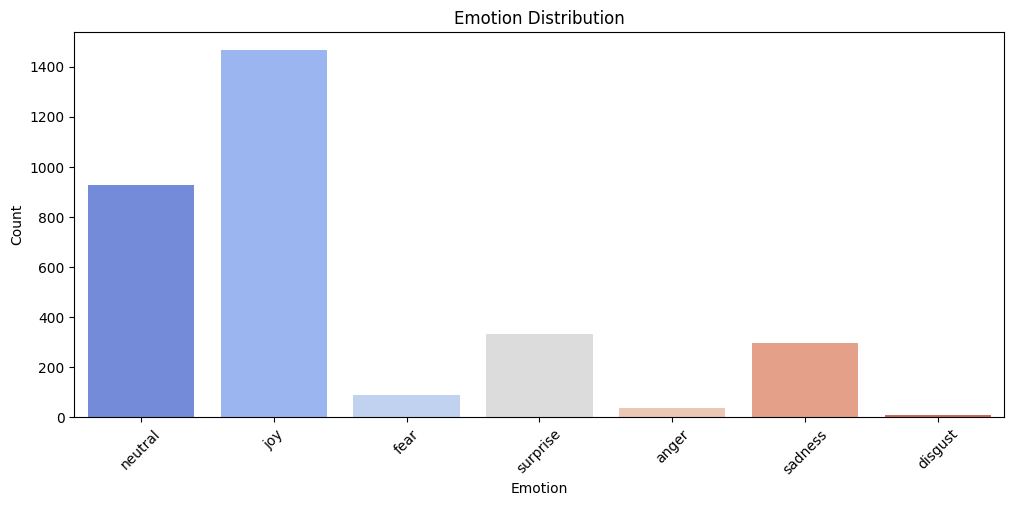

,verified_reviews,sentiment,emotion
0,Love my Echo!,Positive,neutral
1,Loved it!,Positive,joy
2,"Sometimes while playing a game, you can answer...",Negative,neutral
3,I have had a lot of fun with this thing. My 4 ...,Positive,joy
4,Music,Neutral,neutral


In [6]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline

# ------------------------------
# 1. Load the Dataset (TSV Format)
# ------------------------------

# Mount Google Drive if needed
from google.colab import files
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(file_name, sep='\t')  # Read TSV format

# Display first few rows
display(df.head())

# ------------------------------
# 2. Data Preprocessing
# ------------------------------
nltk.download('vader_lexicon')
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Apply cleaning
df['clean_review'] = df['verified_reviews'].apply(clean_text)

# ------------------------------
# 3. Sentiment Analysis (VADER)
# ------------------------------

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['sentiment'] = df['clean_review'].apply(get_sentiment)

# ------------------------------
# 4. Emotion Analysis (Hugging Face Transformer with Truncation)
# ------------------------------

emotion_classifier = pipeline(
    "text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None
)

def get_top_emotion(text):
    text = text[:512]  # Truncate text to avoid indexing errors
    results = emotion_classifier(text)[0]
    return max(results, key=lambda x: x['score'])['label']

# Apply emotion analysis
df['emotion'] = df['clean_review'].apply(get_top_emotion)

# ------------------------------
# 5. Data Visualization
# ------------------------------

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='sentiment', palette={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'})
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='emotion', palette='coolwarm')
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Show processed data
display(df[['verified_reviews', 'sentiment', 'emotion']].head())


Saving uber_reviews_without_reviewid.csv to uber_reviews_without_reviewid.csv


,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,User_0,NaN,Good,5,0,4.556.10005,2024-12-18 17:17:19,NaN,NaN,4.556.10005
1,User_1,NaN,Nice,5,0,4.556.10005,2024-12-18 17:17:17,NaN,NaN,4.556.10005
2,User_2,NaN,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42,NaN,NaN,4.532.10001
3,User_3,NaN,Good,4,0,4.556.10005,2024-12-18 17:08:27,NaN,NaN,4.556.10005
4,User_4,NaN,exllence,5,0,4.556.10005,2024-12-18 17:08:16,NaN,NaN,4.556.10005


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-8-9a7ff612acc5>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'})


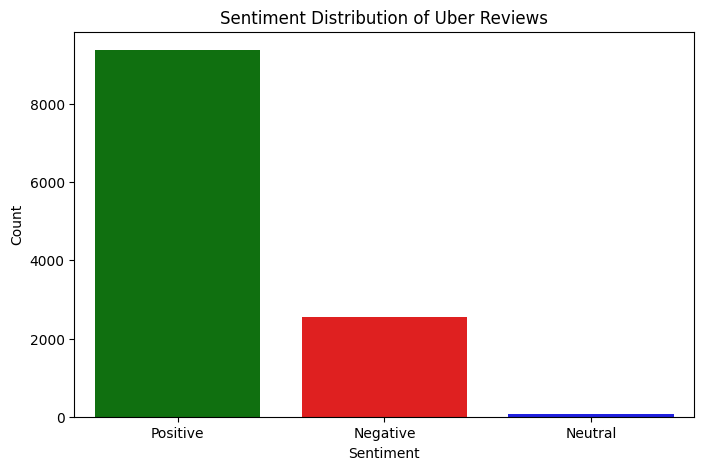

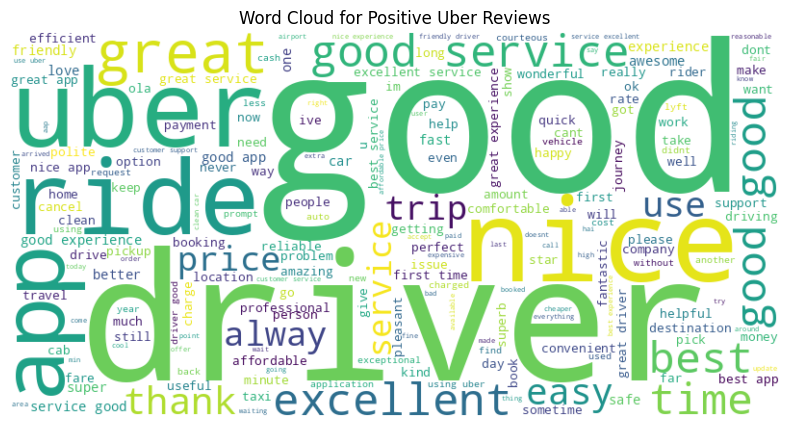

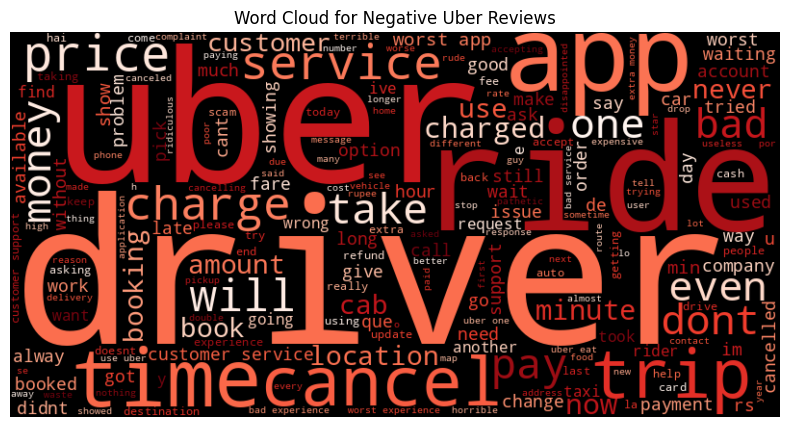

,content,score,sentiment
0,Good,5,Positive
1,Nice,5,Positive
2,Very convenient,5,Positive
3,Good,4,Positive
4,exllence,5,Positive


from matplotlib import pyplot as plt
_df_0['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('content').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['content'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='score', y='content', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [8]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline

# ------------------------------
# 1. Load the Dataset (CSV Format for Uber Reviews)
# ------------------------------

from google.colab import files
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(file_name)

# Display first few rows
display(df.head())

# ------------------------------
# 2. Data Preprocessing
# ------------------------------
nltk.download('vader_lexicon')
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Apply cleaning
df['clean_review'] = df['content'].astype(str).apply(clean_text)

# ------------------------------
# 3. Sentiment Analysis (VADER) using 'content' and 'score'
# ------------------------------

sia = SentimentIntensityAnalyzer()

def get_sentiment(text, score):
    scores = sia.polarity_scores(text)
    if scores['compound'] >= 0.05 or score >= 4:
        return 'Positive'
    elif scores['compound'] <= -0.05 or score <= 2:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['sentiment'] = df.apply(lambda row: get_sentiment(row['clean_review'], row['score']), axis=1)

# ------------------------------
# 4. Data Visualization (In-depth Analysis)
# ------------------------------

# Sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', palette={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'})
plt.title('Sentiment Distribution of Uber Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# WordCloud for Positive Reviews
positive_text = ' '.join(df[df['sentiment'] == 'Positive']['clean_review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Uber Reviews')
plt.show()

# WordCloud for Negative Reviews
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['clean_review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Uber Reviews')
plt.show()

# ------------------------------
# 5. Show Processed Data
# ------------------------------
display(df[['content', 'score', 'sentiment']].head())